In [18]:
from scipy.integrate import solve_ivp
from math import sin, cos
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num)
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'k.:')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()

    return fig, ax

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       9.99799980e+00, 9.99899990e+00, 1.00000000e+01])
 t_events: None
        y: array([[ 5.00000000e-02,  5.00500300e-02,  5.01001101e-02, ...,
         1.09790985e+03,  1.09900845e+03,  1.10010812e+03],
       [ 0.00000000e+00, -6.08844152e-04, -1.21768860e-03, ...,
        -3.59379756e+04, -3.60101606e+04, -3.60824839e+04]])
 y_events: None


(<Figure size 432x288 with 2 Axes>,
 array([[<AxesSubplot:title={'center':'$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>,
         <AxesSubplot:title={'center':'$y_1(t)$ vs. Time'}, xlabel='Time', ylabel='$y_1(t)$'>]],
       dtype=object))

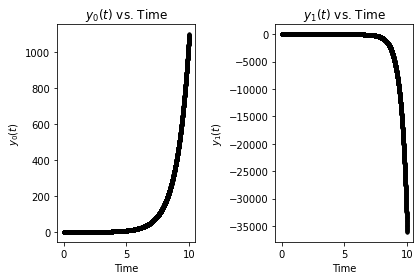

In [35]:
theta = 0.05
g = 9.82
F = 0
m_c = 0.5
m_p = 0.5
m = m_c + m_p
l = 1.0
m_l = m*l

tspan = np.linspace(0, 10, 10000)
yinit = [0.05, 0.00]

def f(t, alpha, theta, g, F, m_l, m, l, m_p):
    alphadot = [
            alpha[0],
            (g * sin(theta) - cos(theta) * ((F + m_l + alpha[0] ** 2 * sin(theta))/m))/(l*(4/3 - m_p * cos(theta)**2 / m))            
    ]
    
    return alphadot

sol = solve_ivp(
    lambda t, alpha: f(t, alpha, theta, g, F, m_l, m, l, m_p),
    [tspan[0], tspan[-1]], yinit, t_eval=tspan
)

print(sol)

state_plotter(sol.t, sol.y, 1)
